___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2022
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg</p>

### <font color= #2E9AFE> Tema: Redes Neuronales para Clasificación</font>

- Las redes neuronales para clasificación toman como salida valores discretos, generalmente valores binarios (0, 1)
- Aplicar con éxito en la red neuronal a un problema de clasificación requiere que los valores de la red estén limitados en un rango de 0 y 1.
- Una transformación no lineal es incluída en el modelo de red neuronal. Usualmente esta transformación es una función sigmoidal. 

**Entonces... ¿qué pasaría si tengo una red neuronal con sólo una capa, donde la función de activación es sigmoidal? sería lo mismo que aplicar una regresión logística**

Red neuronal con una capa con función de activación sigmoidal = Regresión logística

**Modelo matemático**

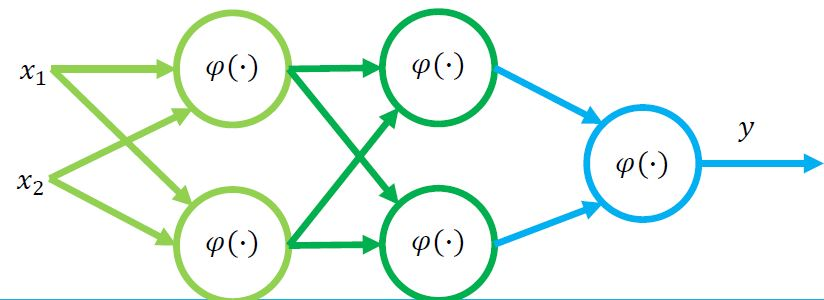

In [1]:
from IPython.display import Image
Image(filename='capa_oculta2.JPG', width=300, height=200)

<font color= #66CC00>$$\nu^{1} = w_{0}^{1}+w^{1}$$</font>
<font color= #66CC00>$$y^{1} = \varphi(\nu^{1})$$</font>
<font color= #009900>$$\nu^{2} = w_{0}^{2}+w^{2}y_{1}$$</font>
<font color= #009900>$$y^{2} = \varphi(\nu^{2})$$</font>
<font color= #3399FF>$$\nu^{3} = w_{0}^{3}+w^{3}y_{2}$$</font>
<font color= #3399FF>$$y^{3} = \varphi(\nu^{3})$$</font>

Para un problema de clasificación multiclase, el número de salidas aumenta en función del número de clases a clasificar

**Ejemplo para salida binaria**

Queremos predecir si una persona va a tener diabetes o no (Outcome)

In [2]:
#Librerías
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r'diabetes.csv')

In [4]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#Seleccionar datos para train y test
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [7]:
#Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
#Construir red neuronal
from keras.models import Sequential
from keras.layers import Dense

# Estructura de la red neuronal
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(8,))) #se puede cambiar la función de activación
model.add(Dense(1, activation='sigmoid')) #La capa de salida debe ser "" para problemas binomiales (0 y 1)

# Configuración del optimizador
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Entrenamiento de la red neuronal
model_history=model.fit(X_train, Y_train,epochs=200, batch_size=100, verbose=1)

Epoch 1/200
6/6 [==============================] - 2s 6ms/step - loss: 0.6505 - accuracy: 0.6034
Epoch 2/200
6/6 [==============================] - 0s 5ms/step - loss: 0.6453 - accuracy: 0.6071
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6405 - accuracy: 0.6127
Epoch 4/200
6/6 [==============================] - 0s 5ms/step - loss: 0.6358 - accuracy: 0.6182
Epoch 5/200
6/6 [==============================] - 0s 4ms/step - loss: 0.6309 - accuracy: 0.6294
Epoch 6/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6266 - accuracy: 0.6294
Epoch 7/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6223 - accuracy: 0.6387
Epoch 8/200
6/6 [==============================] - 0s 8ms/step - loss: 0.6180 - accuracy: 0.6425
Epoch 9/200
6/6 [==============================] - 0s 5ms/step - loss: 0.6141 - accuracy: 0.6536
Epoch 10/200
6/6 [==============================] - 0s 4ms/step - loss: 0.6102 - accuracy: 0.6555
Epoch 11/200
6/6 [===========

6/6 [==============================] - 0s 7ms/step - loss: 0.4949 - accuracy: 0.7691
Epoch 85/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4943 - accuracy: 0.7709
Epoch 86/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4937 - accuracy: 0.7728
Epoch 87/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4930 - accuracy: 0.7728
Epoch 88/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4924 - accuracy: 0.7728
Epoch 89/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4919 - accuracy: 0.7747
Epoch 90/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4913 - accuracy: 0.7747
Epoch 91/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4908 - accuracy: 0.7747
Epoch 92/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4902 - accuracy: 0.7728
Epoch 93/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4896 - accuracy: 0.7728
Epoch 94/200
6/6 [===============

6/6 [==============================] - 0s 5ms/step - loss: 0.4645 - accuracy: 0.7803
Epoch 168/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4643 - accuracy: 0.7803
Epoch 169/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4641 - accuracy: 0.7803
Epoch 170/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4639 - accuracy: 0.7803
Epoch 171/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4637 - accuracy: 0.7803
Epoch 172/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4635 - accuracy: 0.7803
Epoch 173/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4633 - accuracy: 0.7821
Epoch 174/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4631 - accuracy: 0.7821
Epoch 175/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4629 - accuracy: 0.7840
Epoch 176/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4627 - accuracy: 0.7840
Epoch 177/200
6/6 [=====

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

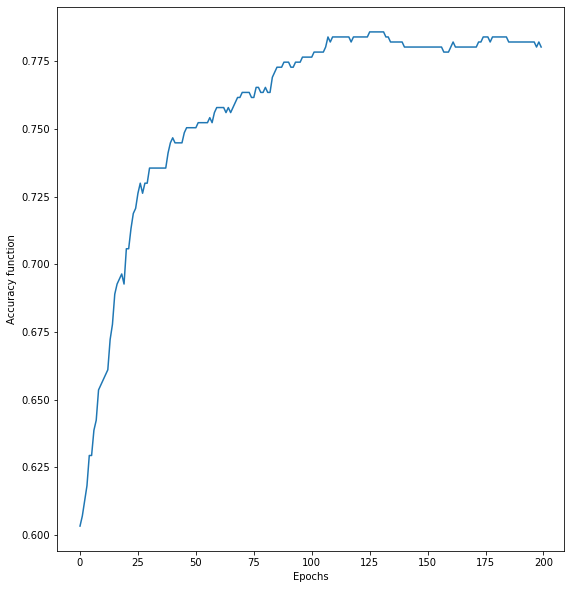

In [9]:
#Ver el performance del modelo en el entrenamiento
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')


In [10]:
#Usar el modelo para predecir
Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")


8/8 [==============================] - 0s 4ms/step


In [11]:
Y_pred

array([[0.29247594],
       [0.15331504],
       [0.10438397],
       [0.27757904],
       [0.5142483 ],
       [0.41008797],
       [0.0251674 ],
       [0.47345158],
       [0.6494761 ],
       [0.58504194],
       [0.3896965 ],
       [0.6965366 ],
       [0.4299314 ],
       [0.35639292],
       [0.09452929],
       [0.37613603],
       [0.09851757],
       [0.07482184],
       [0.7780246 ],
       [0.51856804],
       [0.31722268],
       [0.05514919],
       [0.6962699 ],
       [0.09114391],
       [0.7464749 ],
       [0.8848596 ],
       [0.11873219],
       [0.0363007 ],
       [0.31601134],
       [0.08011077],
       [0.65081644],
       [0.6221703 ],
       [0.81379354],
       [0.8490705 ],
       [0.5336091 ],
       [0.8508469 ],
       [0.8787164 ],
       [0.18397641],
       [0.49233562],
       [0.60046315],
       [0.05221238],
       [0.36726108],
       [0.4156583 ],
       [0.52600086],
       [0.08593455],
       [0.5564316 ],
       [0.53918326],
       [0.223

In [12]:
Y_prob

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [13]:
#Evaluar modelo
score = model.evaluate(X_test, Y_test,verbose=1)
print(score)

8/8 [==============================] - 1s 5ms/step - loss: 0.4743 - accuracy: 0.7792
[0.47426167130470276, 0.7792207598686218]


In [14]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)
accu_train = accuracy_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
prec_train = precision_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
reca_train = recall_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))


accu_test = accuracy_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
prec_test = precision_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
reca_test = recall_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

8/8 [==============================] - 0s 4ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.780 	 0.740 	 0.574
  Test 	 0.779 	 0.693 	 0.650


In [15]:
#Comparar contra Regresión logística
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train,Y_train)
Yhat = model_log.predict(X_train)

accu_train = accuracy_score(Y_train,Yhat)
prec_train = precision_score(Y_train,Yhat)
reca_train = recall_score(Y_train,Yhat)

Yhat = model_log.predict(X_test)
accu_test = accuracy_score(Y_test,Yhat)
prec_test = precision_score(Y_test,Yhat)
reca_test = recall_score(Y_test,Yhat)

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

 	 Accu 	 Prec 	 Reca
 Train 	 0.782 	 0.741 	 0.580
  Test 	 0.736 	 0.617 	 0.625


**Ejemplo Multiclase**

- Aunque las salidas de la red neuronal están limitadas a un rango de valores entre 0 y 1, no se garantiza que la suma de estos sea igual a 1
- Transformar las salidas para que puedan ser usadas como probabilidades ayuda mucho a la interpretabilidad de las predicciones
- Transformación Softmax

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

In [16]:
#Librerías
import pandas as pd
from sklearn import datasets
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD, Adam
#from tensorflow.keras.optimizers import SGD

In [17]:
#Datos
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y #tres tipos de flores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [19]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
#creamos la variable target a dummies
dummy_y = np_utils.to_categorical(Y).astype(int)

In [21]:
dummy_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [22]:
#Dividimos los datos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [23]:
#Construcción de la red neuronal

# neural network structure
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))

#Gradiente descendente
learning_rate=0.1
epochs = 200
momentum = 0.8
decay_rate = learning_rate/epochs
sgd = SGD(lr=learning_rate, decay=decay_rate, momentum=momentum)

# configuracion del optimizador
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# entrenamiento de la red neuronal
#history = model.fit(X, dummy_y,epochs=200, batch_size=100, verbose=1)


history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))


Epoch 1/200
2/2 [==============================] - 2s 904ms/step - loss: 5.3827 - accuracy: 0.3083 - val_loss: 1.2626 - val_accuracy: 0.6333
Epoch 2/200
2/2 [==============================] - 0s 82ms/step - loss: 1.1495 - accuracy: 0.6000 - val_loss: 0.9375 - val_accuracy: 0.5667
Epoch 3/200
2/2 [==============================] - 0s 83ms/step - loss: 0.8960 - accuracy: 0.7083 - val_loss: 1.0387 - val_accuracy: 0.3667
Epoch 4/200
2/2 [==============================] - 0s 130ms/step - loss: 1.0422 - accuracy: 0.3583 - val_loss: 0.9825 - val_accuracy: 0.7000
Epoch 5/200
2/2 [==============================] - 0s 84ms/step - loss: 1.0073 - accuracy: 0.6167 - val_loss: 0.8153 - val_accuracy: 0.7000
Epoch 6/200
2/2 [==============================] - 0s 97ms/step - loss: 0.8719 - accuracy: 0.6583 - val_loss: 0.7620 - val_accuracy: 0.7000
Epoch 7/200
2/2 [==============================] - 0s 93ms/step - loss: 0.7960 - accuracy: 0.6583 - val_loss: 0.7090 - val_accuracy: 0.8000
Epoch 8/200
2/2 [=

2/2 [==============================] - 0s 78ms/step - loss: 0.2747 - accuracy: 0.9667 - val_loss: 0.2653 - val_accuracy: 0.8000
Epoch 60/200
2/2 [==============================] - 0s 78ms/step - loss: 0.2692 - accuracy: 0.9083 - val_loss: 0.2249 - val_accuracy: 1.0000
Epoch 61/200
2/2 [==============================] - 0s 74ms/step - loss: 0.2297 - accuracy: 0.9833 - val_loss: 0.2207 - val_accuracy: 1.0000
Epoch 62/200
2/2 [==============================] - 0s 76ms/step - loss: 0.2271 - accuracy: 0.9750 - val_loss: 0.2162 - val_accuracy: 0.9667
Epoch 63/200
2/2 [==============================] - 0s 94ms/step - loss: 0.2242 - accuracy: 0.9583 - val_loss: 0.2091 - val_accuracy: 1.0000
Epoch 64/200
2/2 [==============================] - 0s 84ms/step - loss: 0.2216 - accuracy: 0.9583 - val_loss: 0.2082 - val_accuracy: 0.9667
Epoch 65/200
2/2 [==============================] - 0s 68ms/step - loss: 0.2186 - accuracy: 0.9500 - val_loss: 0.2053 - val_accuracy: 0.9667
Epoch 66/200
2/2 [========

2/2 [==============================] - 0s 71ms/step - loss: 0.1576 - accuracy: 0.9667 - val_loss: 0.1479 - val_accuracy: 0.9667
Epoch 118/200
2/2 [==============================] - 0s 59ms/step - loss: 0.1531 - accuracy: 0.9667 - val_loss: 0.1540 - val_accuracy: 0.9667
Epoch 119/200
2/2 [==============================] - 0s 68ms/step - loss: 0.1579 - accuracy: 0.9667 - val_loss: 0.1472 - val_accuracy: 1.0000
Epoch 120/200
2/2 [==============================] - 0s 74ms/step - loss: 0.1508 - accuracy: 0.9750 - val_loss: 0.1481 - val_accuracy: 1.0000
Epoch 121/200
2/2 [==============================] - 0s 80ms/step - loss: 0.1513 - accuracy: 0.9833 - val_loss: 0.1444 - val_accuracy: 1.0000
Epoch 122/200
2/2 [==============================] - 0s 88ms/step - loss: 0.1488 - accuracy: 0.9750 - val_loss: 0.1422 - val_accuracy: 1.0000
Epoch 123/200
2/2 [==============================] - 0s 73ms/step - loss: 0.1506 - accuracy: 0.9750 - val_loss: 0.1593 - val_accuracy: 0.9667
Epoch 124/200
2/2 [=

Epoch 175/200
2/2 [==============================] - 0s 89ms/step - loss: 0.1224 - accuracy: 0.9750 - val_loss: 0.1141 - val_accuracy: 1.0000
Epoch 176/200
2/2 [==============================] - 0s 86ms/step - loss: 0.1209 - accuracy: 0.9750 - val_loss: 0.1121 - val_accuracy: 1.0000
Epoch 177/200
2/2 [==============================] - 0s 85ms/step - loss: 0.1208 - accuracy: 0.9750 - val_loss: 0.1117 - val_accuracy: 1.0000
Epoch 178/200
2/2 [==============================] - 0s 99ms/step - loss: 0.1208 - accuracy: 0.9667 - val_loss: 0.1103 - val_accuracy: 1.0000
Epoch 179/200
2/2 [==============================] - 0s 74ms/step - loss: 0.1198 - accuracy: 0.9750 - val_loss: 0.1300 - val_accuracy: 0.9667
Epoch 180/200
2/2 [==============================] - 0s 93ms/step - loss: 0.1436 - accuracy: 0.9500 - val_loss: 0.1116 - val_accuracy: 1.0000
Epoch 181/200
2/2 [==============================] - 0s 75ms/step - loss: 0.1225 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9667
Epoch 

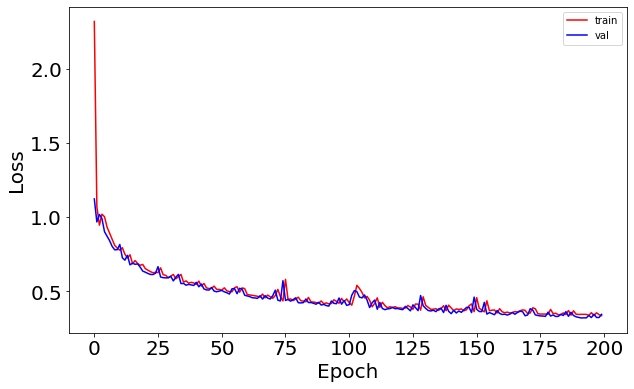

In [24]:
#Graficar el categorical crossentropy
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [25]:
#Predecir con el modelo
#Y_pred = model.predict_classes(X)
#Y_prob = model.predict_proba(X)


Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")

1/1 [==============================] - 0s 57ms/step


In [26]:
Y_pred

array([[4.8584366e-07, 7.6267201e-01, 2.3732750e-01],
       [9.6194637e-01, 3.8018666e-02, 3.4978279e-05],
       [1.6431809e-23, 1.7292752e-04, 9.9982709e-01],
       [1.4317430e-07, 6.8882209e-01, 3.1117779e-01],
       [3.1388106e-07, 7.3752397e-01, 2.6247567e-01],
       [9.6194637e-01, 3.8018666e-02, 3.4978279e-05],
       [3.6303299e-03, 9.7935289e-01, 1.7016791e-02],
       [5.5015796e-13, 6.9607921e-02, 9.3039203e-01],
       [2.2318678e-09, 3.9919734e-01, 6.0080266e-01],
       [3.3099661e-04, 9.6275651e-01, 3.6912493e-02],
       [1.2038055e-11, 1.4159851e-01, 8.5840148e-01],
       [9.6194637e-01, 3.8018666e-02, 3.4978279e-05],
       [9.6194637e-01, 3.8018666e-02, 3.4978279e-05],
       [9.6194637e-01, 3.8018666e-02, 3.4978279e-05],
       [9.6194637e-01, 3.8018666e-02, 3.4978279e-05],
       [2.7615769e-07, 7.2987562e-01, 2.7012408e-01],
       [9.4510770e-18, 4.7283447e-03, 9.9527162e-01],
       [1.2499350e-04, 9.4974852e-01, 5.0126459e-02],
       [2.1997899e-07, 7.159

In [27]:
Y_prob

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [28]:
#Reverse
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = np_utils.to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [29]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [30]:
#Más métricas corregido
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)
Y_proba= model.predict(X_train)
Y_pred= np.argmax(Y_proba, axis=1)

accu_train = accuracy_score(y_train, Y_pred)
prec_train = precision_score(y_train, Y_pred,average='weighted')
reca_train = recall_score(y_train, Y_pred,average='weighted')

Y_proba= model.predict(X_test)
Y_pred= np.argmax(Y_proba, axis=1)

accu_test = accuracy_score(y_test, Y_pred)
prec_test = precision_score(y_test, Y_pred,average='weighted')
reca_test = recall_score(y_test, Y_pred,average='weighted')
print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

1/1 [==============================] - 0s 60ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.967 	 0.970 	 0.967
  Test 	 0.967 	 0.969 	 0.967


In [31]:
#Comparar contra Regresión logística
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train,y_train)
Yhat = model_log.predict(X_test)

accu_train = accuracy_score(y_train,model_log.predict(X_train))
prec_train = precision_score(y_train,model_log.predict(X_train),average='weighted')
reca_train = recall_score(y_train,model_log.predict(X_train),average='weighted')

accu_test = accuracy_score(y_test,model_log.predict(X_test))
prec_test = precision_score(y_test,model_log.predict(X_test),average='weighted')
reca_test = recall_score(y_test,model_log.predict(X_test),average='weighted')

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

 	 Accu 	 Prec 	 Reca
 Train 	 0.975 	 0.977 	 0.975
  Test 	 1.000 	 1.000 	 1.000
